In [33]:
! pip install prophet



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 871.5 kB/s eta 0:00:16
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 2.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/13.3 MB 2.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.4/13.3 MB 3.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.3 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 4.1 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 3.8 MB/s eta 0:00:03
   ------ -

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [35]:
# Charger les données
file_path = 'Transfert_ new.csv'
transfert_data = pd.read_csv(file_path, sep=';')
transfert_data.columns = transfert_data.columns.str.strip().str.replace('ï»¿', '')

In [36]:
# Convertir la colonne 'dou' en datetime si nécessaire
transfert_data['dou'] = pd.to_datetime(transfert_data['dou'], errors='coerce')

# Ajouter une colonne année et mois
transfert_data['année_mois'] = transfert_data['dou'].dt.to_period('M')

In [37]:
# Calculer la somme des flux par mois
flux_mensuels = transfert_data.groupby('année_mois')['mcfa'].sum().reset_index()
flux_mensuels['année_mois'] = flux_mensuels['année_mois'].dt.to_timestamp()
flux_mensuels = flux_mensuels.rename(columns={'année_mois': 'ds', 'mcfa': 'y'})

In [38]:
# Initialisation et ajustement du modèle Prophet
model = Prophet()
model.fit(flux_mensuels)

# Faire des prévisions pour les 12 prochains mois
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


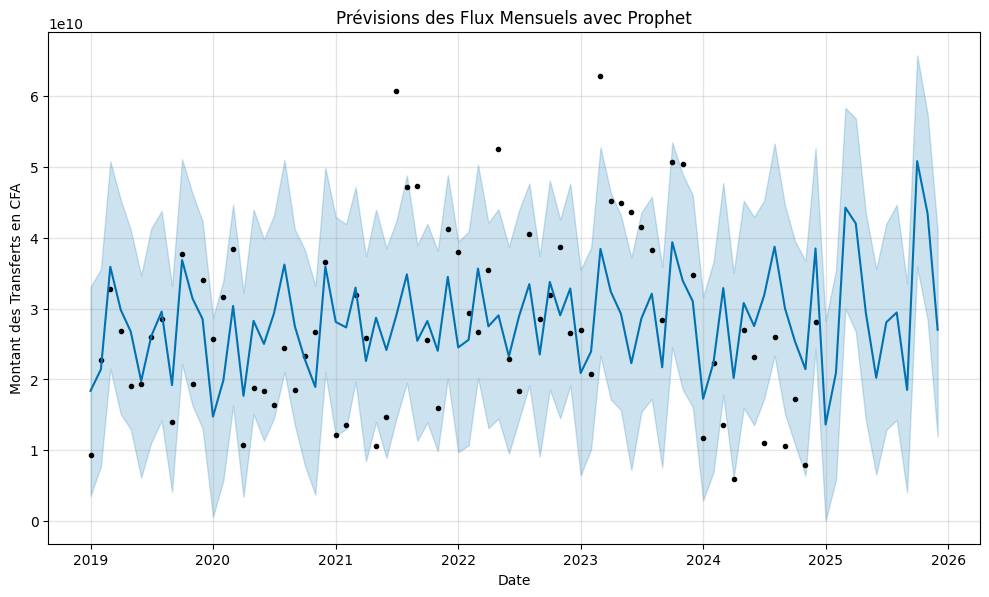

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Local

In [39]:
# Visualisation des prévisions
fig1 = model.plot(forecast)
plt.title('Prévisions des Flux Mensuels avec Prophet')
plt.xlabel('Date')
plt.ylabel('Montant des Transferts en CFA')
plt.show()

# Visualisation des composantes
fig2 = model.plot_components(forecast)
plt.show()
